In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from joblib import dump
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

# 7-neural-networks

In [3]:
X_train = pd.read_csv('../data/processed/train_features.csv')
y_train = pd.read_csv('../data/processed/train_target.csv')

In [4]:
X_test = pd.read_csv('../data/processed/test_features.csv')
y_test = pd.read_csv('../data/processed/test_target.csv')

In [5]:
X_train = X_train.select_dtypes('number')
X_test = X_test.select_dtypes('number')

In [6]:
cols = X_train.columns.tolist()

In [7]:
assert list(X_train.columns) == list(X_test.columns)

In [8]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

In [9]:
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [10]:
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)

## Multi-layer perceptron

In [11]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [12]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100, 100), (50, 100, 50)],
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001]    
}

In [13]:
mlp = MLPRegressor(random_state=42)

In [14]:
t1 = time.time()
gscv = GridSearchCV(mlp, n_jobs=-1, cv=cv, param_grid=param_grid, verbose=1)
gscv.fit(X_train, y_train.ravel())
t2 = time.time()
print(t2 - t1)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
273.1191759109497


In [15]:
mlp = gscv.best_estimator_
mlp

MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 100), random_state=42)

In [16]:
dump(mlp, '../models/mlp.joblib')

['../models/mlp.joblib']

In [17]:
y_pred = mlp.predict(X_train)
mean_squared_error(
    target_scaler.inverse_transform(y_train),
    target_scaler.inverse_transform(y_pred.reshape(-1, 1)),
    squared=False
)

4651.392291619794

In [18]:
y_pred = mlp.predict(X_test)
mean_squared_error(
    target_scaler.inverse_transform(y_test),
    target_scaler.inverse_transform(y_pred.reshape(-1, 1)),
    squared=False
)

4880.184917121395

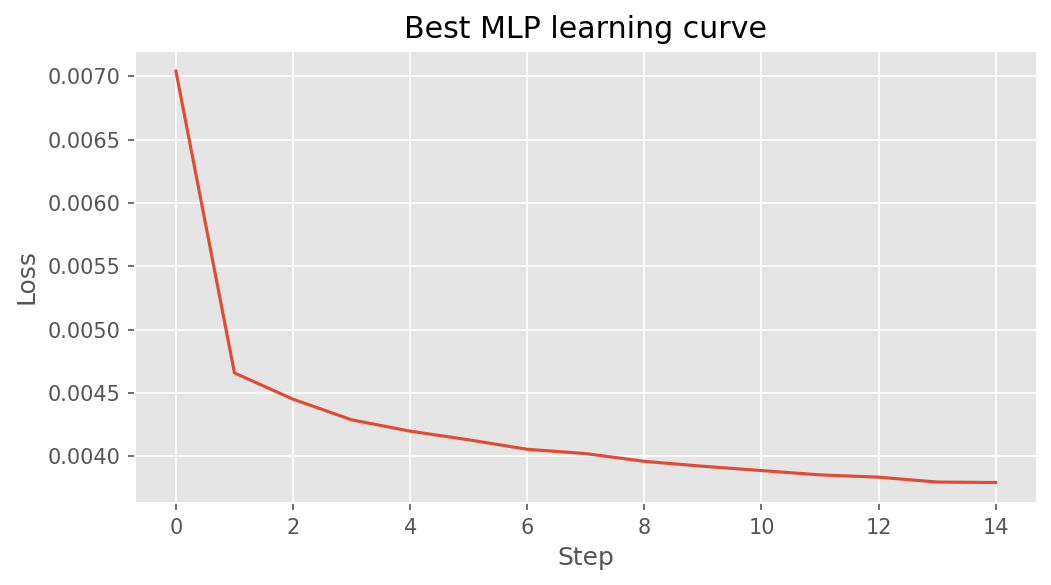

In [19]:
plt.figure(figsize=(4 * (16/9),4), dpi=150)
plt.plot(mlp.loss_curve_)
plt.title('Best MLP learning curve')
plt.ylabel('Loss')
plt.xlabel('Step')
plt.tight_layout()
plt.savefig(f'../reports/figures/mlp_learning_curve.png')
plt.show()